In [40]:
import pandas as pd
import numpy as np


In [41]:
stocks= pd.read_csv("DataCleaning.csv")
stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,18/11/99,32.546494,35.765381,28.612303,31.473534,26.652395,62546380
1,19/11/99,30.713518,30.758226,28.478184,28.880545,24.456600,15234146
2,22/11/99,29.551144,31.473534,28.657009,31.473534,26.652395,6577870
3,23/11/99,30.400572,31.205294,28.612303,NaN,24.229446,5975611
4,24/11/99,28.701717,29.998213,28.612303,29.372318,24.873049,4843231
...,...,...,...,...,...,...,...
6172,03/06/24,130.000000,132.580002,130.000000,131.399994,131.399994,3114800
6173,04/06/24,131.240005,132.250000,130.279999,130.850006,130.850006,2893700
6174,05/06/24,130.539993,134.199997,130.009995,133.559998,133.559998,2707500
6175,06/06/24,132.460007,134.350006,132.279999,132.820007,132.820007,2269600


In [42]:
print(stocks.isnull().sum())


Date          0
Open          0
High          6
Low          11
Close         9
Adj Close     2
Volume        0
dtype: int64


In [43]:
print(stocks.duplicated().sum())

0


In [44]:
stocks.index.is_monotonic_increasing

True

In [48]:
# stocks["Close"] =stocks['Close'].interpolate(method='linear',limit_direction='both')
stocks["Close"]=stocks['Close'].interpolate(method='polynomial', order=2,limit_direction="both")
# stocks["Close"]=stocks['Close'].interpolate(method='spline', order=3)

In [49]:
stocks["Close"].isnull().sum()


0

In [50]:
stocks["High"]=stocks["High"].interpolate(method='polynomial', order=2,limit_direction="both")
stocks["Low"]=stocks["Low"].interpolate(method='polynomial', order=2,limit_direction="both")
stocks["Adj Close"]=stocks["Adj Close"].interpolate(method='polynomial', order=2,limit_direction="both")

In [51]:
stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [66]:
stocks.to_csv("CleanedData")

In [52]:
stocks["return"]=stocks["Close"].pct_change()

<Axes: >

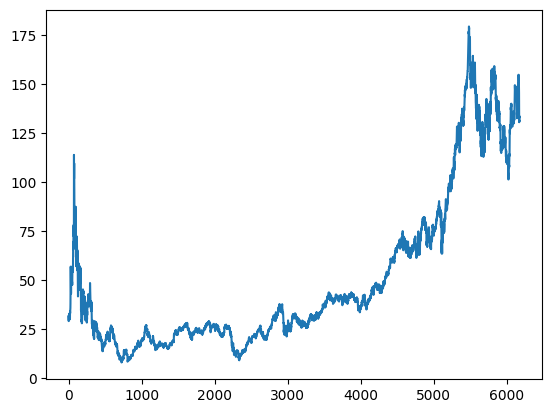

In [54]:
stocks.Close.plot()

<Axes: >

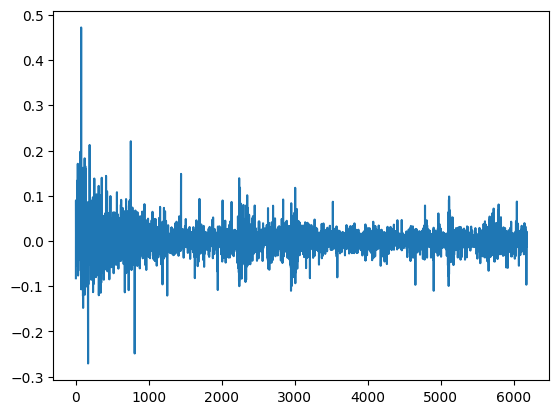

In [55]:
stocks["return"].plot()

In [61]:
print(stocks["return"].mean()/stocks["return"].std())

0.021840506976589336


In [63]:
down_ret =stocks["return"]<0
print(stocks["return"].mean()/down_ret.std())

0.0011448764496672186


In [65]:
cumulative_returns = (1 + stocks["return"]).cumprod()
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
print(stocks["return"].mean()/max_drawdown)

-0.0006138371295035552
